# Assignment 4
Patrick Erath (260719203)

In [ ]:
# 5 Data-Batches - each 10,000 images
    # Data - 10,000 x 3072  => Each row 1 32x32 picture
                                # Entries [R, G, B] (Row-Major Order)
    # Labels - 10,0000 x 1 => 0-9 Indicates Index (car, truck, etc)
# 1 Test-Batch - 10,000 images

# batches.meta - python dictionary for naming indices

In [47]:
# Read in data-batch-1 and convert to image
import pickle 
import numpy as np
import matplotlib.pyplot as plt

# Unpickle file - from documentation
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

batch1_path = './data/data_batch_1'
names_path = './data/batches.meta'

try:
    batch_1 = unpickle(batch1_path)
    data_names = unpickle(names_path)
except Exception as e:
    print(e)

## Convert to Images

Data Shape (10000, 3072)


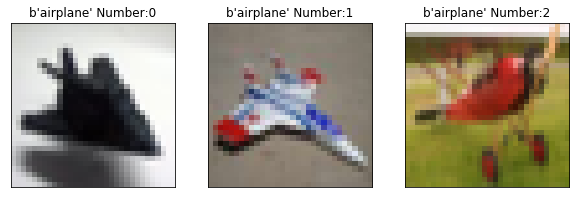

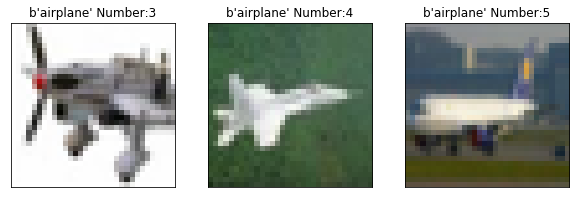

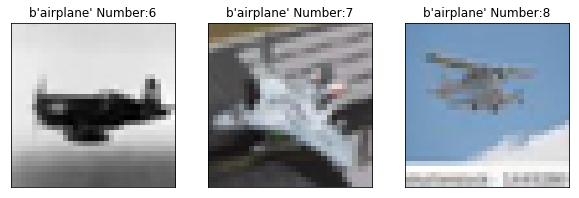

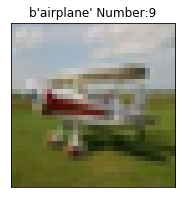

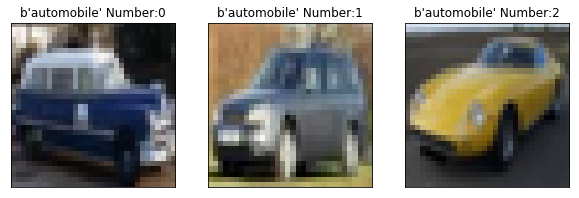

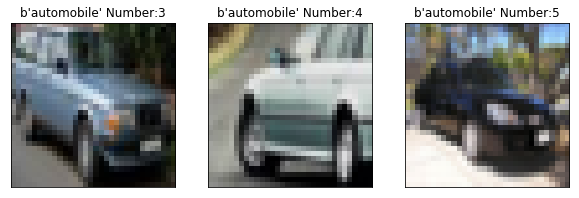

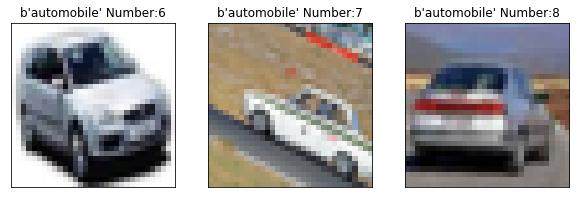

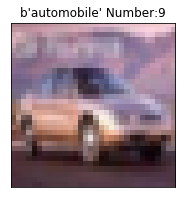

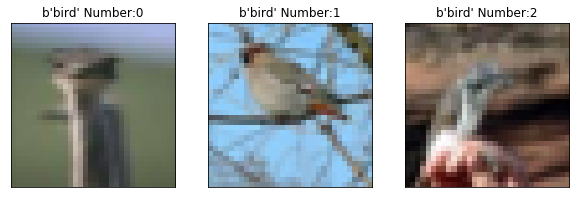

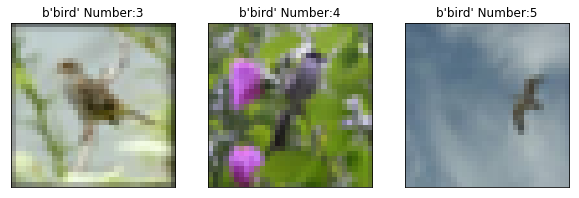

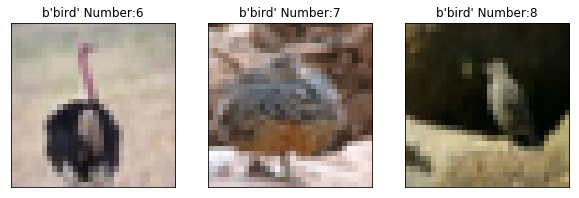

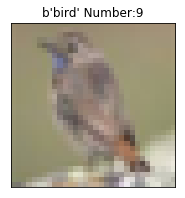

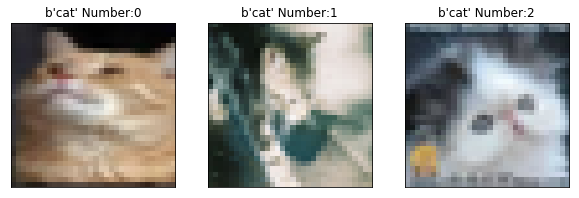

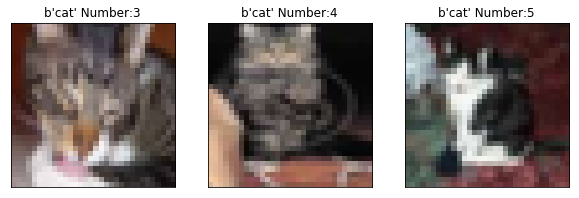

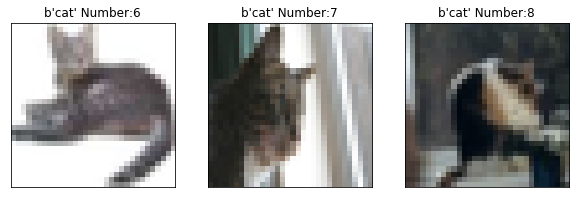

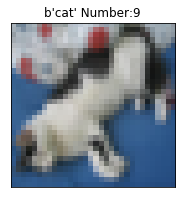

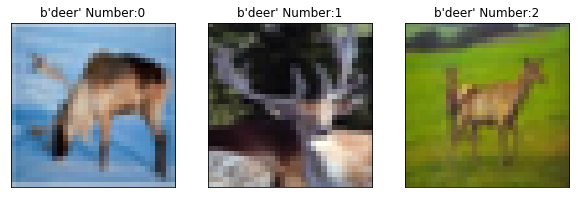

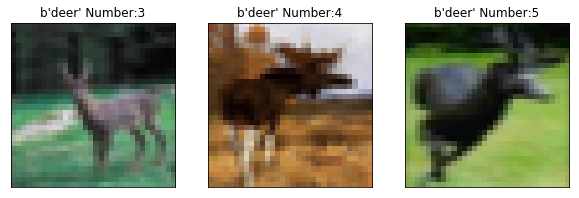

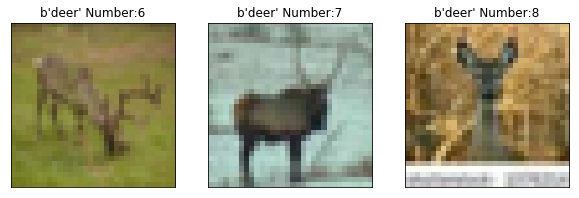

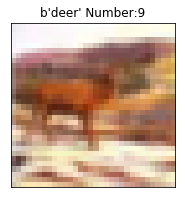

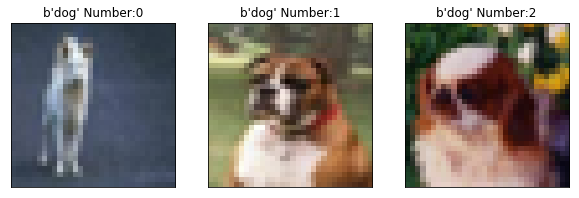

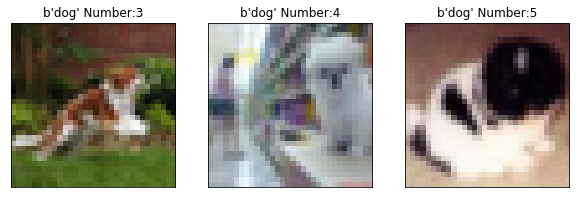

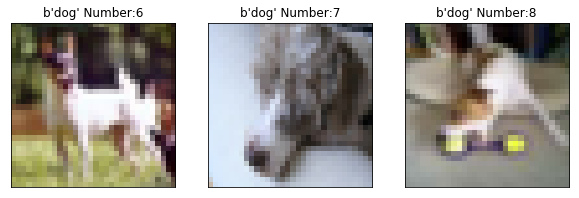

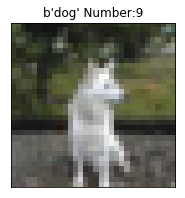

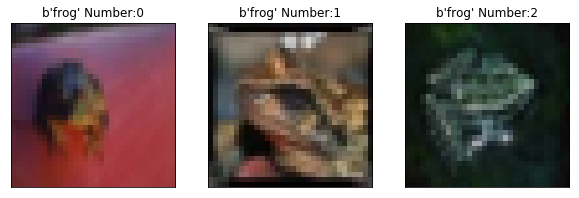

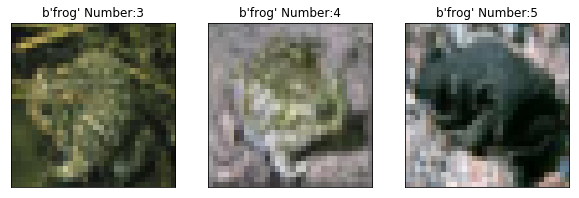

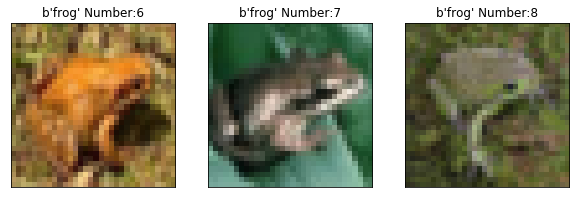

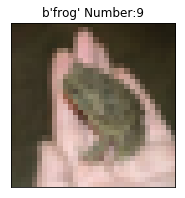

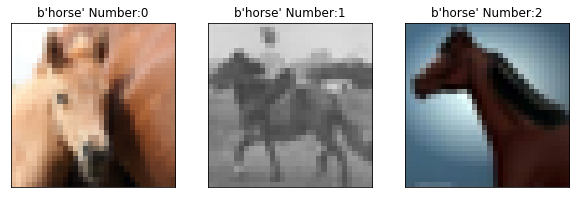

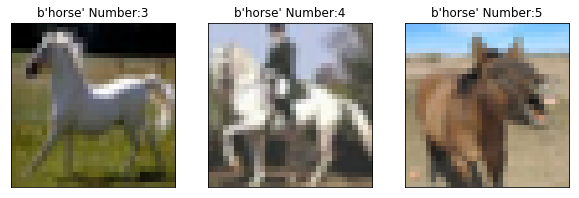

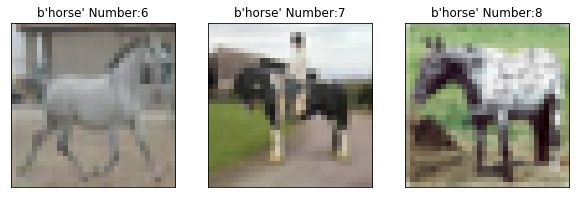

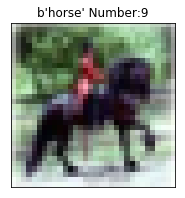

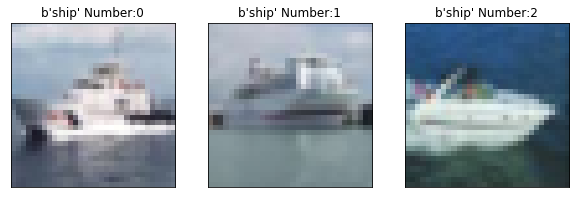

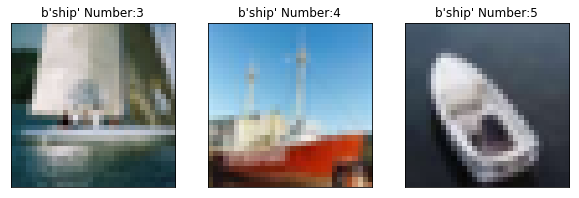

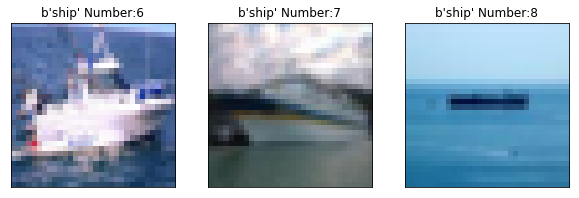

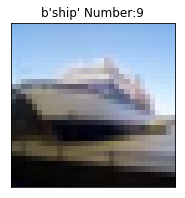

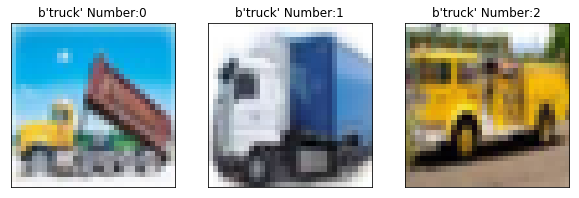

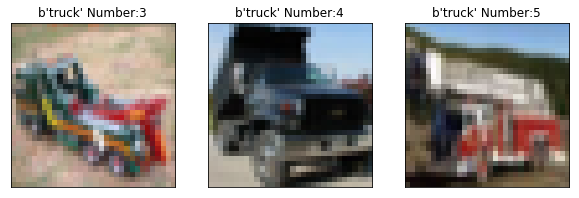

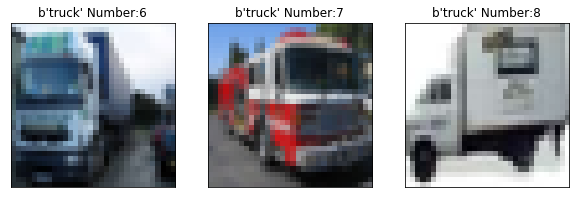

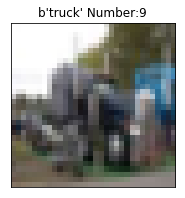

In [74]:
data_batch_1 = batch_1[b'data']
label_batch_1 = batch_1[b'labels']
print('Data Shape', data_batch_1.shape)

# Reshape image such that it has RGB chanels for plotting
data_reshaped = data_batch_1.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
        
arr = [131, 132, 133]
index = 0
j=0
for i in range(10):
    counter = 0
    while(counter != 10):
        if(label_batch_1[index] == i):
            if(counter%3==0):
                plt.figure(figsize=(10,10))
                j=0
            plt.subplot(arr[j])
            plt.title(str(data_names[b'label_names'][i])+' Number:'+str(counter))
            plt.imshow(data_reshaped[index])
            plt.xticks([]), plt.yticks([])
            counter += 1
            j += 1
        index += 1

            
plt.show()

## Feature Extraction

In [88]:
# Make a function which takes list of images as arguments
# and delivers list of HoG features as output. 

import cv2
def hog_features(imgs_arr, cell_size=(8,8), block_size=(2,2), nbins=9):
    hog_feats_arr = []
    count = 0
    for img in imgs_arr:
        # Check window size
        if(img.shape[0]%32!=0 or img.shape[1]%32!=0):
            raise Exception('Invalid Image Size')
        else:
            # Compute window size
            win_XY = img.shape[0] // cell_size[0] * cell_size[1]
            
            # Compute blocks
            block_XY = block_size[0] * cell_size[0]
            
            # Create HoG object
            hog = cv2.HOGDescriptor(_winSize = (win_XY, win_XY),
                                    _blockSize = (block_XY, block_XY),
                                    _blockStride = (cell_size[1], cell_size[0]),
                                    _cellSize = (cell_size[1], cell_size[0]),
                                    _nbins = nbins
                                   )
            
            # Compute number of cells 
            n_cells = (img.shape[0] // cell_size[0], img.shape[1] // cell_size[1])
            
            # Compute HoG features
            hog_feats = hog.compute(img) \
                            .reshape(n_cells[1] - block_size[1] + 1,
                                     n_cells[0] - block_size[0] +1, 
                                     block_size[1], block_size[0], nbins) \
                            .transpose((1, 0, 3, 2, 4))
            
            hog_feats_arr.append(hog_feats)
            
    return hog_feats_arr

In [161]:
from sklearn import svm

# Extract features using HoG
try:
    features_arr = hog_features(data_reshaped)
except Exception as e:
    print(e)

# Create SVM Trainer
svm_trainer_1 = svm.SVC(gamma='scale')

# Train 
#svm_trainer_1.fit(features_arr, label_batch_1)


# Import testing data and testing indices
test_path = './data/test_batch'
testing_set = unpickle(test_path)

test_data = testing_set[b'data']
test_data = test_data.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
test_indices = testing_set[b'labels']


# TODO 
# Extract features using Mean Intensity Values
# Train SVM

In [146]:
features_mapped = []
features_reshaped = []
for i in range(len(features_arr)):
    features_mapped.append(features_arr[i][:, :, 0,0,0])
    features_reshaped.append(np.ndarray.flatten(features_mapped[i]))

In [150]:
test_path = './data/test_batch'
testing_set = unpickle(test_path)

test_data = testing_set[b'data']
test_data = test_data.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
test_indices = testing_set[b'labels']

In [148]:
print(len(features_reshaped))
svm_trainer_1.fit(features_reshaped, label_batch_1)

10000


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [158]:
# Get HoG features for  images
feats_training = hog_features(test_data)

# Flatten HoG feats
feats_training_flat = []
for i in range(len(feats_training)):
    temp = features_arr[i][:, :, 0,0,0]
    feats_training_flat.append(np.ndarray.flatten(temp))

print("P:", svm_trainer_1.predict(feats_training_flat[:20]))
print("A:", test_indices[:20])

P: [6 2 9 6 1 3 4 7 8 9 4 6 7 8 9 9 6 9 8 3]
A: [3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6]


10000
(3, 3, 2, 2, 9)
[[0.10748051 0.11309522 0.04800657]
 [0.1493013  0.18623823 0.14133522]
 [0.19202702 0.18041049 0.1878801 ]]


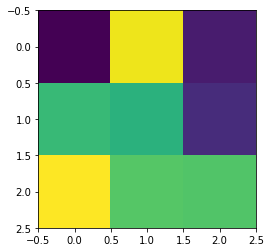

In [135]:
print(len(features_arr))
print(features_arr[0].shape)
print(features_arr[0][:, :, 0,0,0])
plt.imshow(features_arr[2][:, :, 0,0,0])
#plt.imshow(features_arr[:, :, 0,0,0])

In [108]:
# Create SVM Trainer
svm_trainer_1 = svm.SVC(gamma='scale')

print(len(features_arr))
print(len(label_batch_1))

# Train 
#svm_trainer_1.fit(features_arr, label_batch_1)


10000
10000


In [98]:
test_path = './data/test_batch'
testing_set = unpickle(test_path)

test_data = testing_set[b'data']
test_data = test_data.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
test_indices = testing_set[b'labels']

In [35]:
data_names

{b'num_cases_per_batch': 10000,
 b'label_names': [b'airplane',
  b'automobile',
  b'bird',
  b'cat',
  b'deer',
  b'dog',
  b'frog',
  b'horse',
  b'ship',
  b'truck'],
 b'num_vis': 3072}

In [42]:
data_names[b"label_names"]

[b'airplane',
 b'automobile',
 b'bird',
 b'cat',
 b'deer',
 b'dog',
 b'frog',
 b'horse',
 b'ship',
 b'truck']

In [51]:
batch_1

{b'batch_label': b'training batch 1 of 5',
 b'labels': [6,
  9,
  9,
  4,
  1,
  1,
  2,
  7,
  8,
  3,
  4,
  7,
  7,
  2,
  9,
  9,
  9,
  3,
  2,
  6,
  4,
  3,
  6,
  6,
  2,
  6,
  3,
  5,
  4,
  0,
  0,
  9,
  1,
  3,
  4,
  0,
  3,
  7,
  3,
  3,
  5,
  2,
  2,
  7,
  1,
  1,
  1,
  2,
  2,
  0,
  9,
  5,
  7,
  9,
  2,
  2,
  5,
  2,
  4,
  3,
  1,
  1,
  8,
  2,
  1,
  1,
  4,
  9,
  7,
  8,
  5,
  9,
  6,
  7,
  3,
  1,
  9,
  0,
  3,
  1,
  3,
  5,
  4,
  5,
  7,
  7,
  4,
  7,
  9,
  4,
  2,
  3,
  8,
  0,
  1,
  6,
  1,
  1,
  4,
  1,
  8,
  3,
  9,
  6,
  6,
  1,
  8,
  5,
  2,
  9,
  9,
  8,
  1,
  7,
  7,
  0,
  0,
  6,
  9,
  1,
  2,
  2,
  9,
  2,
  6,
  6,
  1,
  9,
  5,
  0,
  4,
  7,
  6,
  7,
  1,
  8,
  1,
  1,
  2,
  8,
  1,
  3,
  3,
  6,
  2,
  4,
  9,
  9,
  5,
  4,
  3,
  6,
  7,
  4,
  6,
  8,
  5,
  5,
  4,
  3,
  1,
  8,
  4,
  7,
  6,
  0,
  9,
  5,
  1,
  3,
  8,
  2,
  7,
  5,
  3,
  4,
  1,
  5,
  7,
  0,
  4,
  7,
  5,
  5,
  1,
  0,
  9,
  6,
  9,
 

In [57]:
labels_counter = np.zeros(10)
print(labels_counter)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [60]:
label_batch_1

[6,
 9,
 9,
 4,
 1,
 1,
 2,
 7,
 8,
 3,
 4,
 7,
 7,
 2,
 9,
 9,
 9,
 3,
 2,
 6,
 4,
 3,
 6,
 6,
 2,
 6,
 3,
 5,
 4,
 0,
 0,
 9,
 1,
 3,
 4,
 0,
 3,
 7,
 3,
 3,
 5,
 2,
 2,
 7,
 1,
 1,
 1,
 2,
 2,
 0,
 9,
 5,
 7,
 9,
 2,
 2,
 5,
 2,
 4,
 3,
 1,
 1,
 8,
 2,
 1,
 1,
 4,
 9,
 7,
 8,
 5,
 9,
 6,
 7,
 3,
 1,
 9,
 0,
 3,
 1,
 3,
 5,
 4,
 5,
 7,
 7,
 4,
 7,
 9,
 4,
 2,
 3,
 8,
 0,
 1,
 6,
 1,
 1,
 4,
 1,
 8,
 3,
 9,
 6,
 6,
 1,
 8,
 5,
 2,
 9,
 9,
 8,
 1,
 7,
 7,
 0,
 0,
 6,
 9,
 1,
 2,
 2,
 9,
 2,
 6,
 6,
 1,
 9,
 5,
 0,
 4,
 7,
 6,
 7,
 1,
 8,
 1,
 1,
 2,
 8,
 1,
 3,
 3,
 6,
 2,
 4,
 9,
 9,
 5,
 4,
 3,
 6,
 7,
 4,
 6,
 8,
 5,
 5,
 4,
 3,
 1,
 8,
 4,
 7,
 6,
 0,
 9,
 5,
 1,
 3,
 8,
 2,
 7,
 5,
 3,
 4,
 1,
 5,
 7,
 0,
 4,
 7,
 5,
 5,
 1,
 0,
 9,
 6,
 9,
 0,
 8,
 7,
 8,
 8,
 2,
 5,
 2,
 3,
 5,
 0,
 6,
 1,
 9,
 3,
 6,
 9,
 1,
 3,
 9,
 6,
 6,
 7,
 1,
 0,
 9,
 5,
 8,
 5,
 2,
 9,
 0,
 8,
 8,
 0,
 6,
 9,
 1,
 1,
 6,
 3,
 7,
 6,
 6,
 0,
 6,
 6,
 1,
 7,
 1,
 5,
 8,
 3,
 6,
 6,
 8,
 6,
 8,
 4,
 6,
 6,


In [65]:
data_names

{b'num_cases_per_batch': 10000,
 b'label_names': [b'airplane',
  b'automobile',
  b'bird',
  b'cat',
  b'deer',
  b'dog',
  b'frog',
  b'horse',
  b'ship',
  b'truck'],
 b'num_vis': 3072}

In [67]:
data_names[b'label_names'][0]

b'airplane'

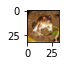